# Importing Libraries 

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading Dataset

In [62]:
dataset = pd.read_csv("Country-data.csv")
x = dataset.iloc[:,1:10].values
dataset.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [63]:
dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Clustering by K-Means 

## Using Elbow Method for Optimal Number of Clusters 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


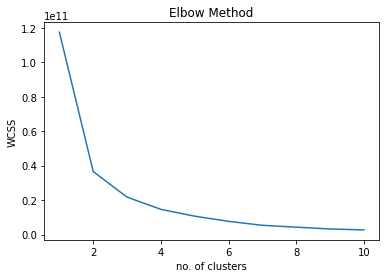

In [64]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)  
plt.title('Elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

## Training K-means model 

In [65]:
kmeans = KMeans(init = 'k-means++', random_state = 42, n_clusters = 3)
y_km = kmeans.fit_predict(x)

In [66]:
y_km

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

### Adding new row to dataset for assigning k-means cluster number

In [67]:
dataset['km_cluster'] = y_km
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


### Visualizing results

In [69]:
c0 = dataset.loc[dataset['km_cluster'] == 0]
pd.set_option("display.max_rows", None)
display(c0.country)
len(c0)

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
24                           Bulgaria
25                       Burkina Faso
26                            Burundi
27                           Cambodia
28                           Cameroon
30                         Cape Verde
31           Central African Republic
32                               Chad
33          

128

# Hierarchical Clustering 

## Using Dendrogram for optimal number of cluster 

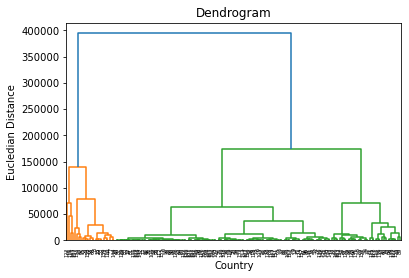

In [70]:
import scipy.cluster.hierarchy as sch
dg = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Country')
plt.ylabel('Eucledian Distance')
plt.show()

## Trainig Hierarchical Clustering model 

In [75]:
from sklearn.cluster import AgglomerativeClustering as ac
hc = ac(n_clusters = 3, linkage = 'ward', affinity = 'euclidean')
y_hc = hc.fit_predict(x)
y_hc

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

### Adding new row to dataset  for assigning hierarchical cluster number

In [76]:
dataset['hc_clustering'] = y_hc
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster,hc_clustering
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


### Visualizing results 

In [80]:
hc0 = dataset.loc[dataset['hc_clustering'] == 2]
pd.set_option("display.max_rows", None)
display(hc0.country)
len(hc0)

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
6                             Armenia
9                          Azerbaijan
12                         Bangladesh
14                            Belarus
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
24                           Bulgaria
25                       Burkina Faso
26                            Burundi
27                           Cambodia
28                           Cameroon
30                         Cape Verde
31           Central African Republic
32                               Chad
34                              China
35                           Colombia
36                            Comoros
37                   Congo, Dem. Rep.
38          

108